### **Import necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#getting files location
url = os.getcwd()

### **Read the dataset**

In [3]:
#creating files pathes
path1 = "\\Aviation_Marketing_Project_Flight_data.csv"
path2 = "\\Aviation_Marketing_Project_Survey_data.csv"
path3 = "\\Aviation_Marketing_Project_Data_Dictionary.csv"

In [4]:
#reading files and printing Dataframe shape
data = pd.read_csv(url+path1)
print(f'In "data" dataframe there are {data.shape[0]} rows and {data.shape[1]} columns.')  # f-string
survey = pd.read_csv(url+path2)
print(f'In "survey" dataframe there are {survey.shape[0]} rows and {survey.shape[1]} columns.')  # f-string
dic = pd.read_csv(url+path3)
print(f'In "survey" dataframe there are {survey.shape[0]} rows and {survey.shape[1]} columns.')  # f-string

In "data" dataframe there are 90917 rows and 9 columns.
In "survey" dataframe there are 90917 rows and 16 columns.
In "survey" dataframe there are 90917 rows and 16 columns.


### **Getting some information and data types about the data¶**

In [5]:
#getting data dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90917 entries, 0 to 90916
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerID             90917 non-null  int64  
 1   Gender                 90917 non-null  object 
 2   CustomerType           81818 non-null  object 
 3   Age                    90917 non-null  int64  
 4   TypeTravel             81829 non-null  object 
 5   Class                  90917 non-null  object 
 6   Flight_Distance        90917 non-null  int64  
 7   DepartureDelayin_Mins  90917 non-null  int64  
 8   ArrivalDelayin_Mins    90633 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 6.2+ MB


**Observations:**
- Missing values are found on variables: CustomerType, TypeTravel, ArivalDelayin_Mins
- Futher investigation about missing values and if there are any pattern in the missingness should be checked.
- Variables name can be included "_" between words for better comprehension

In [6]:
#getting survey dataset info
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90917 entries, 0 to 90916
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   CustomerId                         90917 non-null  int64 
 1   Satisfaction                       90917 non-null  object
 2   Seat_comfort                       90917 non-null  object
 3   Departure.Arrival.time_convenient  82673 non-null  object
 4   Food_drink                         82736 non-null  object
 5   Gate_location                      90917 non-null  object
 6   Inflightwifi_service               90917 non-null  object
 7   Inflight_entertainment             90917 non-null  object
 8   Online_support                     90917 non-null  object
 9   Ease_of_Onlinebooking              90917 non-null  object
 10  Onboard_service                    83738 non-null  object
 11  Leg_room_service                   90917 non-null  object
 12  Bagg

**Observations:**
- Missing values are found on variables: Departure.Arrival.time_convenient, Food_drink, Onboard_service. 
- Futher investigation about missing values and if there are any pattern in the missingness should be checked.
- Variables name can be included "_" between words, and replaced "." for standardization, comprehension and avoid errors in models.

In [7]:
#Checking first 5 rows of the data
data.head()

,CustomerID,Gender,CustomerType,Age,TypeTravel,Class,Flight_Distance,DepartureDelayin_Mins,ArrivalDelayin_Mins
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0
2,149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0
3,149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0
4,149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0


In [8]:
#Checking first 5 rows of the survey
survey.head()

,CustomerId,Satisfaction,Seat_comfort,Departure.Arrival.time_convenient,Food_drink,Gate_location,Inflightwifi_service,Inflight_entertainment,Online_support,Ease_of_Onlinebooking,Onboard_service,Leg_room_service,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,149965,satisfied,extremely poor,extremely poor,extremely poor,need improvement,need improvement,good,need improvement,acceptable,acceptable,extremely poor,acceptable,excellent,acceptable,need improvement
1,149966,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,NaN,acceptable,good,good,good,need improvement
2,149967,satisfied,extremely poor,NaN,extremely poor,manageable,acceptable,good,acceptable,poor,poor,extremely poor,poor,good,poor,acceptable
3,149968,satisfied,extremely poor,extremely poor,extremely poor,manageable,good,acceptable,good,need improvement,need improvement,extremely poor,need improvement,good,need improvement,excellent
4,149969,satisfied,extremely poor,extremely poor,extremely poor,manageable,need improvement,extremely poor,need improvement,need improvement,excellent,good,excellent,excellent,good,need improvement


In [9]:
#Getting columns names for correction
data.columns

Index(['CustomerID', 'Gender', 'CustomerType', 'Age', 'TypeTravel', 'Class',
       'Flight_Distance', 'DepartureDelayin_Mins', 'ArrivalDelayin_Mins'],
      dtype='object')

In [10]:
#Correcting columns names for futher processing
data.columns=['Customer_Id', 'Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Class',
       'Flight_Distance', 'Departure_Delayin_Mins', 'Arrival_Delayin_Mins']

In [11]:
#Getting columns names for correction
survey.columns

Index(['CustomerId', 'Satisfaction', 'Seat_comfort',
       'Departure.Arrival.time_convenient', 'Food_drink', 'Gate_location',
       'Inflightwifi_service', 'Inflight_entertainment', 'Online_support',
       'Ease_of_Onlinebooking', 'Onboard_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Cleanliness',
       'Online_boarding'],
      dtype='object')

In [12]:
#Correcting columns names for futher processing
survey.columns=['Customer_Id', 'Satisfaction', 'Seat_Comfort',
       'Departure_Arrival_Time_Convenient', 'Food_Drink', 'Gate_Location',
       'Inflight_Wifi_Service', 'Inflight_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Leg_Room_Service',
       'Baggage_Handling', 'Checkin_Service', 'Cleanliness',
       'Online_Boarding']

### **Merging datasets¶**

In [13]:
#Merge two dataframes based on "CustomerId" common column
df = pd.merge(data, survey, on=["Customer_Id"])

In [14]:
#Checking dataset after merge
df.head()

,Customer_Id,Gender,Customer_Type,Age,Type_Travel,Class,Flight_Distance,Departure_Delayin_Mins,Arrival_Delayin_Mins,Satisfaction,...,Inflight_Wifi_Service,Inflight_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Leg_Room_Service,Baggage_Handling,Checkin_Service,Cleanliness,Online_Boarding
0,149965,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0.0,satisfied,...,need improvement,good,need improvement,acceptable,acceptable,extremely poor,acceptable,excellent,acceptable,need improvement
1,149966,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0.0,satisfied,...,need improvement,extremely poor,need improvement,need improvement,NaN,acceptable,good,good,good,need improvement
2,149967,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0.0,satisfied,...,acceptable,good,acceptable,poor,poor,extremely poor,poor,good,poor,acceptable
3,149968,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0.0,satisfied,...,good,acceptable,good,need improvement,need improvement,extremely poor,need improvement,good,need improvement,excellent
4,149969,Male,Loyal Customer,30,NaN,Eco,1894,0,0.0,satisfied,...,need improvement,extremely poor,need improvement,need improvement,excellent,good,excellent,excellent,good,need improvement


**Observations:**
- One important thing by comparing both datasets: CustomerId column are common for both. This can help merge process based on this variable. 
- Second point, NaN values are present in the dataset. This may indicate the dataset was already treated for further processing.

In [15]:
#Checking dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90917 entries, 0 to 90916
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer_Id                        90917 non-null  int64  
 1   Gender                             90917 non-null  object 
 2   Customer_Type                      81818 non-null  object 
 3   Age                                90917 non-null  int64  
 4   Type_Travel                        81829 non-null  object 
 5   Class                              90917 non-null  object 
 6   Flight_Distance                    90917 non-null  int64  
 7   Departure_Delayin_Mins             90917 non-null  int64  
 8   Arrival_Delayin_Mins               90633 non-null  float64
 9   Satisfaction                       90917 non-null  object 
 10  Seat_Comfort                       90917 non-null  object 
 11  Departure_Arrival_Time_Convenient  82673 non-null  obj

**Observations:**
- Interesting factor: Before dataset merge, each data set had 6.2 and 11.1 MB respectively (Total= 17.3 MB)
- After correcting data types dataset lower to 8.3 MB which represents a good optimization related to processing time.

In [16]:
# Correcting data types to categories
x = df.columns
for i in x:
    if  df[i].dtype == 'object':
        df[i] = df[i].astype('category')

In [17]:
#Checking data statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Id,90917.0,195423.000000,26245.621549,149965.0,172694.0,195423.0,218152.0,240881.0
Age,90917.0,39.447166,15.129794,7.0,27.0,40.0,51.0,85.0
Flight_Distance,90917.0,1981.629442,1026.779932,50.0,1360.0,1927.0,2542.0,6950.0
Departure_Delayin_Mins,90917.0,14.686593,38.669260,0.0,0.0,0.0,12.0,1592.0
Arrival_Delayin_Mins,90633.0,15.058930,39.038523,0.0,0.0,0.0,13.0,1584.0


**Observations:**
* Variables:
    * Age: It can observed that there are a great range between 7 to 85 years old
    - Fligh_Distance: variable presents a slight right skewed distribuition
    - Departure_Delayin_Mins: Presents an average = "0" which is good.
    - Arrival_Delayin_Mins	: Presents an average = "0" which is good.
    - Both Arrival_Delayin_Mins	and Arrival_Delayin_Mins have their maximum values close to 1500 minutes(approx 25h). They should be checked.       

### **EDA**

#### Plotting univariate distributions

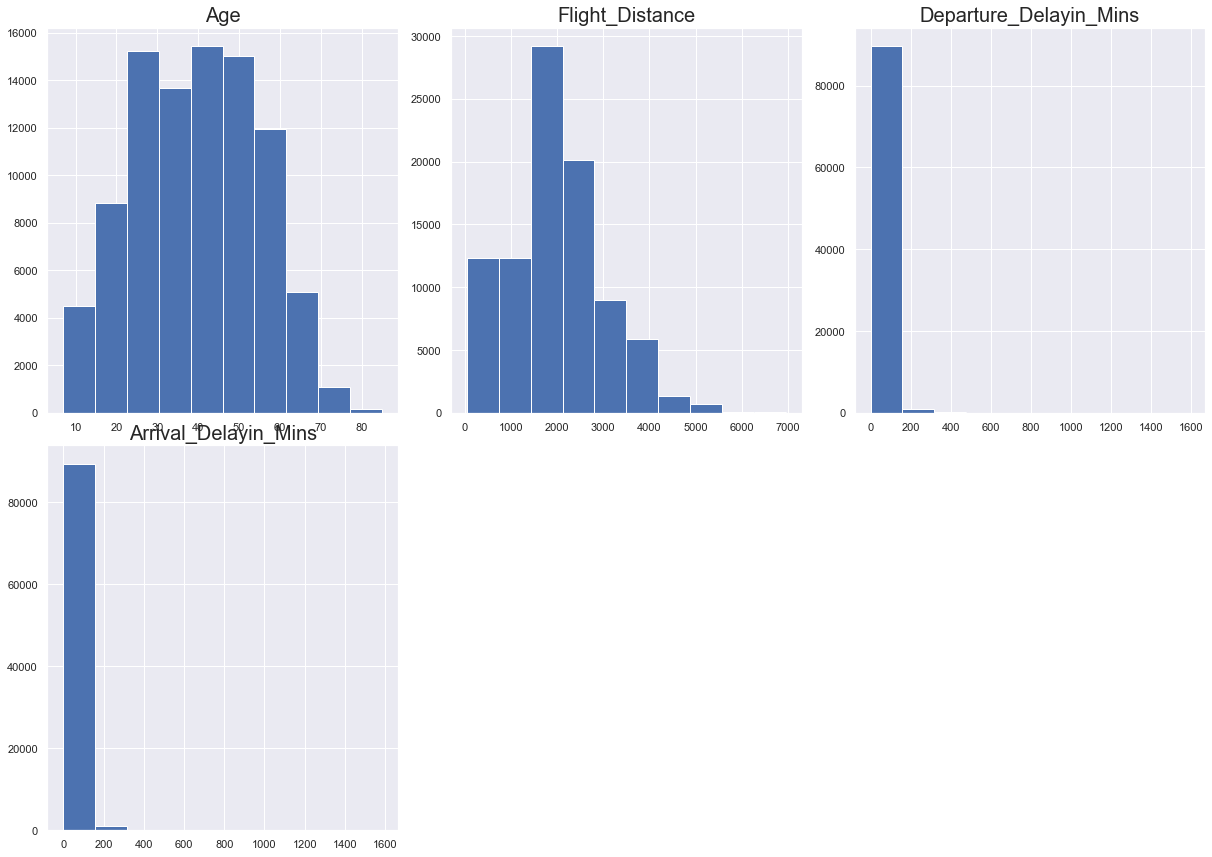

In [94]:
#plotting set of subplots for each numerical variable
sns.set(font_scale=1.0)
all_col = df.select_dtypes(include=np.number).columns.tolist()
all_col.remove('Customer_Id')
plt.figure(figsize=(17,35))

for i in range(len(all_col)):
    plt.subplot(6,3,i+1)
    plt.hist(df[all_col[i]])
    #sns.displot(loan[all_col[i]], kde=True)
    plt.tight_layout()
    plt.title(all_col[i],fontsize=20)

plt.show()

**Observations:**
* Age: It can observed that there are a great variability in age: from 7 to 85 years old
* Fligh_Distance: variable presents a slight right skewed distribuition
* Departure_Delayin_Mins: Presents most frequent number been "0" minutes which is good.
* Arrival_Delayin_Mins	: Presents most frequent number been "0" minutes which is good.
* Both Arrival_Delayin_Mins and Arrival_Delayin_Mins have their maximum values close to 1500 minutes(approx 25h). They should be checked.

In [20]:
#While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    sns.set(font_scale=2) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='red') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

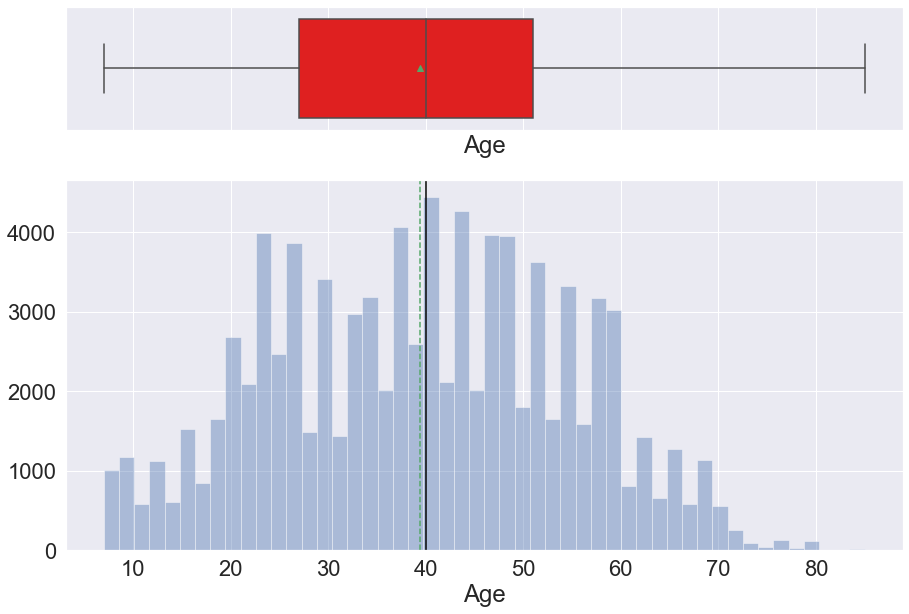

In [21]:
histogram_boxplot(df.Age)

**Observations:**
* Age: Variable presents a normal distribution and does have a good variability


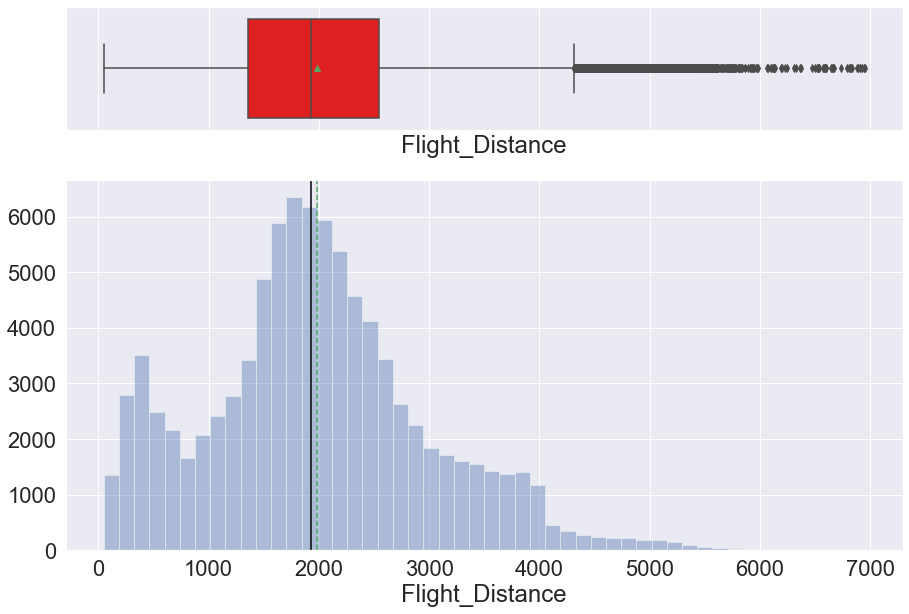

In [22]:
histogram_boxplot(df.Flight_Distance)

**Observations:**
* Flight Distance: Variable presents two picks at 500 and 2000 however seems to have a normal distribution. It does also have a big quantity of outliers.

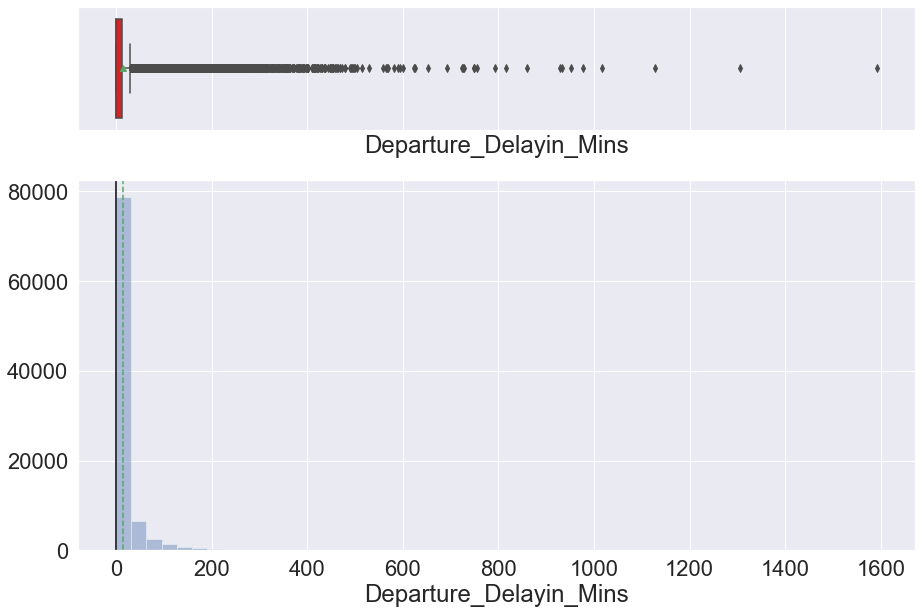

In [23]:
histogram_boxplot(df.Departure_Delayin_Mins)

**Observations:**
* Departure_Delayin_Mins: Most frequent data are aroud "0" which is good for the business.

In [64]:
# Function to create barplots that indicate percentage for each category.
sns.set(font_scale=1.0)
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

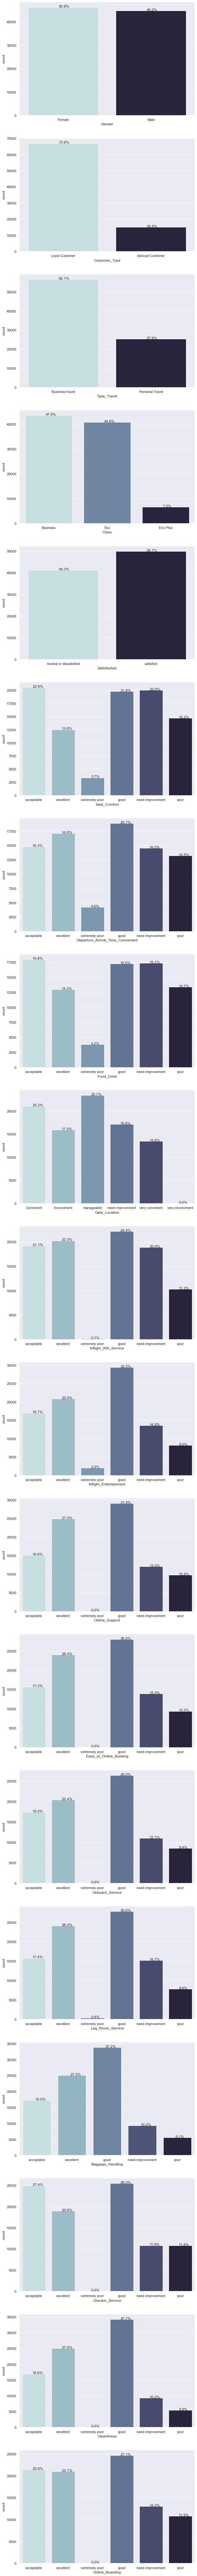

In [65]:
# Plotting all counts of observations in each categorical variable
sns.set(font_scale=1.0)
all_cat = df.select_dtypes(include='category').columns.tolist()

plt.figure(figsize=(10,150))

for i in range(len(all_cat)):
    plt.subplot(19,1,i+1)
    ax = sns.countplot(df[all_cat[i]],palette="ch:start=.2,rot=-.3")
    bar_perc(ax,df[all_cat[i]])
plt.show()

**Observations:**
* Gender: Altought Females 50.8% represent most cases the difference is very small.
* Customer_Type: Loyal Customer represent 73.6% and disloyal ones represent 16.4%
* Type_Travel: Business travel reason represent most travels with 62.1%.
* Preffered Class: Business with 47.9% followed by Economic 44.8%

**Qualitative Measures:**

* Satisfaction: 54.7% of customers are satisfied. (45.3%) were not. Since this is the target variable this dataset can be considered slightely unbalanced.
* Seat_confort: Adding up categories from Acceptable to Excellent we have 58.2% and on the other hand (41.9%) were not satisfied with the seat_confort. This high percentage should be taken in account in the future.
* Departure Arrival Time Convenient: Adding up categories from Acceptable to Excellent we have 55.8% but on the other hand (35.1%) were not satisfied. This high percentage should be taken in account in the future.
* Food Drink: 66.4% rated food as positive. (33.6%) rated as need improvement or poor.
* Gate Location: 63.7% rated it as positive. (36.3%) rated as need improvement or poor.
* Inflight Wifi: 67.8% rated it as positive. (32.2%) negative, with 18.8% of it saying it need improvement.
* Inflight Entertainment: 73.9% rated it as positive, with (23.9%) of it saying it need improvement or poor.
* Online Support: 73.9% rated it as positive with the remaining (24.1%) negative, being 13.3% as needing improvement and 10.8% as poor.
* Ease_of_Online_Booking: 74.5% rated it as positive with the remaining (25.6%) negative, being  15.3% as needing improvement and 10.3% as poor.
* Onboard_Service: 70.6% rated it as positive with the remaining (21.5%) negative, being 12.1% as needing improvement and 9.4% as poor.
* Leg_Room_Service: 74.5% rated it as positive with the remaining (25.3%) negative, being 16.7% needing improvement and 8.6% as poor.
* Baggage_Handling: 83.7% rated it as positive with the remaining (18.3%) negative, being 10.2% as needing improvement and 6.1% as poor.
* Checkin_Service: 76.2% rated it as positive with the remaining (23.7%) negative, being 11.9% as needing improvement and 11.8% as poor.
* Cleanliness: 83.9% rated it as positive with the remaining (16.1%) negative, being 10.2% as needing improvement and 5.9% as poor.
* Online_Boarding: 73.8% rated it as positive with the remaining (26.1%) negative, being 14.3% as needing improvement and 11.9% as poor.

**Rejection Percentages above 25% that need further investigation**

- Satisfaction: Rejection percentage: (45.3%) 
- Seat_confort: Rejection percentage: (41.9%)
- Gate Location: Rejection percentage: (36.3%) 
- Departure Arrival Time Convenient: Rejection percentage: (35.1%) 
- Food Drink: Rejection percentage: (33.6%)
- Inflight Wifi: Rejection percentage: (32.2%)
- Online_Boarding: Rejection percentage: (26.1%)
- Ease_of_Online_Booking: Rejection percentage: (25.6%)

### **Pre-processing step for deeper insights from Correlation¶**

In [26]:
#Checking information from dictionary
dic.head(80)

,Unnamed: 0,Seat_Comfort,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,0.0,extremely poor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,poor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,need improvement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,acceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
75,3.0,acceptable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,4.0,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,5.0,excellent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**
- Data was reorganized in column only in Excel for better visualization.
- Although the output of the survey or regard to the words used to express customer's opinion are not consistent across all questions For example: Very confinient or excelent representing maximum score, words do not need to be changed since numerically the survery's outputs are consistent and standardized in a scale from 0 to 5. 

In [27]:
#Creating a copy to start changing the data. Original dataset
#was kept to quicker access if needed.
df_p = df.copy()

**Information:**
- As it was observed in the dataset "survey" and by comparing to information file "dic", variable index to be converted from categorical to numerial starts from 2 up to 15.

In [28]:
#Creating a list of numbers with required range
index_interate = [i for i in range(10,24,1)]

In [29]:
#checking list
index_interate

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [30]:
#numerical value 5 index from dataset "survey" is the only one 
#which the following code will no apply. It will be treated separate.
(index_interate.pop(3))
index_interate

[10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

In [31]:
#Getting column names from the index_interate var
#in order to run next lines
col_interate = []
for i in index_interate:
    x = df_p.columns[i]
    col_interate.append(x)
print(col_interate)  

['Seat_Comfort', 'Departure_Arrival_Time_Convenient', 'Food_Drink', 'Inflight_Wifi_Service', 'Inflight_Entertainment', 'Online_Support', 'Ease_of_Online_Booking', 'Onboard_Service', 'Leg_Room_Service', 'Baggage_Handling', 'Checkin_Service', 'Cleanliness', 'Online_Boarding']


In [32]:
# Converting catergorical to numerical variables
dic_conv = {"extremely poor":0,"poor":1,"need improvement":2,"acceptable":3,"good":4,"excellent":5}
for i in filter(None, col_interate):
    df_p[i]=df_p[i].map(dic_conv).astype('float')

In [33]:
# Converting categorical to numerical for separate variable 'Gate_location'
dic2_conv = {"very inconvinient":0,"Inconvinient":1,"need improvement":2,"manageable":3,"Convinient":4,"very convinient":5}
df_p['Gate_Location']=df_p['Gate_Location'].map(dic2_conv).astype('float')

In [34]:
#Checking if conversion worked
df_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90917 entries, 0 to 90916
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Customer_Id                        90917 non-null  int64   
 1   Gender                             90917 non-null  category
 2   Customer_Type                      81818 non-null  category
 3   Age                                90917 non-null  int64   
 4   Type_Travel                        81829 non-null  category
 5   Class                              90917 non-null  category
 6   Flight_Distance                    90917 non-null  int64   
 7   Departure_Delayin_Mins             90917 non-null  int64   
 8   Arrival_Delayin_Mins               90633 non-null  float64 
 9   Satisfaction                       90917 non-null  category
 10  Seat_Comfort                       90917 non-null  float64 
 11  Departure_Arrival_Time_Convenient  82673 

In [35]:
# looking at value counts for non-numeric features

num_to_display = 10  # defining this up here so it's easy to change later if I want
for colname in df.dtypes[df_p.dtypes == 'category'].index:
    val_counts = df_p[colname].value_counts(dropna=False)  # i want to see NA counts
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n') # just for more space between 

Female    46186
Male      44731
Name: Gender, dtype: int64



Loyal Customer       66897
disloyal Customer    14921
NaN                   9099
Name: Customer_Type, dtype: int64



Business travel    56481
Personal Travel    25348
NaN                 9088
Name: Type_Travel, dtype: int64



Business    43535
Eco         40758
Eco Plus     6624
Name: Class, dtype: int64



satisfied                  49761
neutral or dissatisfied    41156
Name: Satisfaction, dtype: int64





**Observations:**
- This last line was to check if more values would need to be converted from categorical to numerical. Found categoricals will not be converted at this point since they do not have similar pattern as others categoricals and will be used onehot encoding later one.

In [36]:
#Pairplot
#sns.set(font_scale=0.75)
#sns.pairplot(data=df_p.drop(['Customer_Id','Gender','Customer_Type','Type_Travel','Class'],axis=1), corner=True,hue='Satisfaction')
#plt.savefig('pairplot1.png', dpi=200) #transparent=True)

**Observations:**
* Data was saved in PNG format and opened in a visualization software for easier manipulation.
* This plot was used to gather any direction for next set of visualizations
* The following variables observed from this Pairplot will be further investigated on later steps:
    * Age x Departure Delay Min
    * Age x Arrival Delay Min
    * Arrival x Departure Delay Min
    * Flight Distance x Gate Location
    * Gate Location x Seat Confort
    * Inflight Wifi Service x Arrival Delay Min
    * Inflght Enterteinament x Arrival Delay Min
    * Cleaness x Seat Confort
* Check independent variable agaist target variable "Satisfaction" 
    * Seat Confort
    * Gate Location
    * Inflght Enterteinament
    * Food_drink

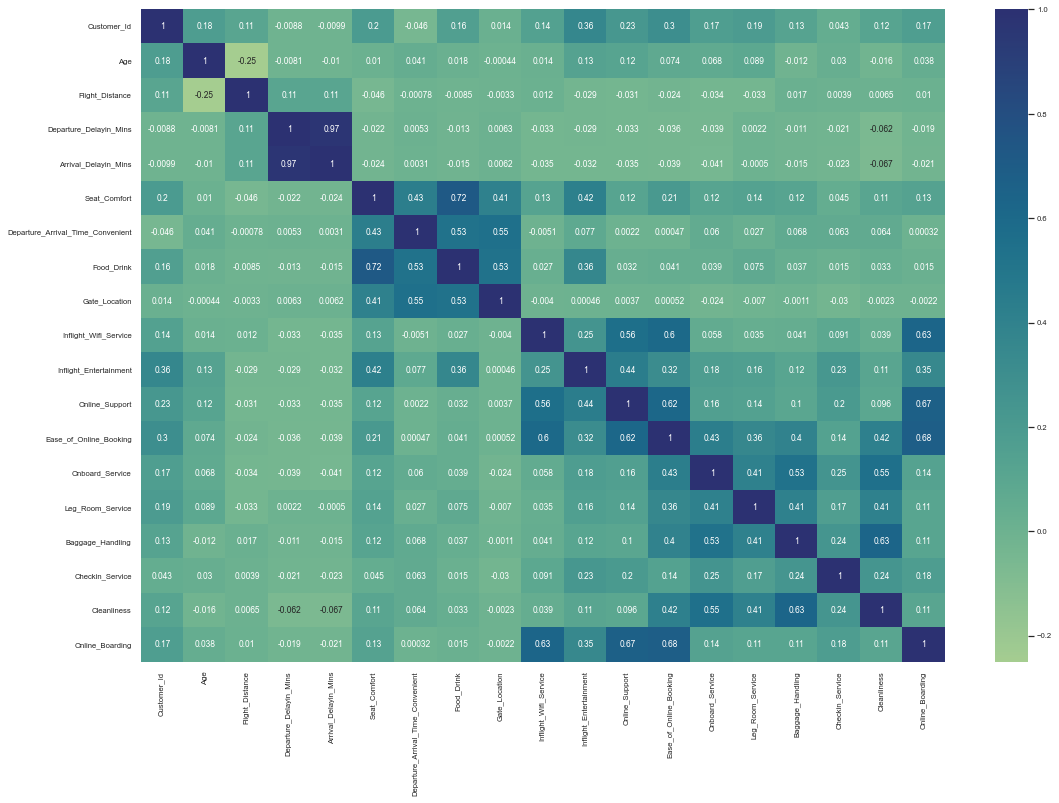

In [67]:
plt.figure(figsize=(18, 12))
sns.set(font_scale=0.70)
sns.heatmap(df_p.corr(), annot=True, cmap="crest")
plt.savefig('heatmap.png', dpi=300) #transparent=True)

**Sorting Correlation Matrix by greatest coefficients**

In [38]:
#In order to speed the process to get insights from correlation matrix and heat map
#next lines of code do a sort by most correlated variables
#This code also include negative correlated values but does not tell which one
#The Negative values check will be done manually by comparing to heat map plot.

corr_matrix = df_p.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

#first element of sol series is the pair with the biggest correlation

In [104]:
#Correlated Variables sorted by their highest coefficient in Ascending Order
#The goal is focus on correlated values superior to .25
#Blank space is equal to previous variable (above).
#It was verified an none of below lines are negative.
Corr = pd.DataFrame(data=sol,columns=['Correlation Coefficient'])
Corr.head(31)

Correlation Coefficient
Departure_Delayin_Mins            Arrival_Delayin_Mins                              0.966162
Seat_Comfort                      Food_Drink                                        0.719175
Ease_of_Online_Booking            Online_Boarding                                   0.684488
Online_Support                    Online_Boarding                                   0.670567
Baggage_Handling                  Cleanliness                                       0.632392
Inflight_Wifi_Service             Online_Boarding                                   0.630631
Online_Support                    Ease_of_Online_Booking                            0.617208
Inflight_Wifi_Service             Ease_of_Online_Booking                            0.602718
                                  Online_Support                                    0.557419
Onboard_Service                   Cleanliness                                       0.549253
Departure_Arrival_Time_Convenient Gate_Location                                     0.546402
Onboard_Service                   Baggage_Handling                                  0.527337
Departure_Arrival_Time_Convenient Food_Drink                                        0.527108
Food_Drink                        Gate_Location                                     0.526295
Inflight_Entertainment            Online_Support                                    0.442551
Seat_Comfort                      Departure_Arrival_Time_Convenient                 0.434804
Ease_of_Online_Booking            Onboard_Service                                   0.432267
Seat_Comfort                      Inflight_Entertainment                            0.423241
Ease_of_Online_Booking            Cleanliness                                       0.417755
Leg_Room_Service                  Cleanliness                                       0.411145
Onboard_Service                   Leg_Room_Service                                  0.408848
Seat_Comfort                      Gate_Location                                     0.407987
Leg_Room_Service                  Baggage_Handling                                  0.407503
Ease_of_Online_Booking            Baggage_Handling                                  0.398915
Food_Drink                        Inflight_Entertainment                            0.364716
Customer_Id                       Inflight_Entertainment                            0.362066
Ease_of_Online_Booking            Leg_Room_Service                                  0.355395
Inflight_Entertainment            Online_Boarding                                   0.353676
                                  Ease_of_Online_Booking                            0.319445
Customer_Id                       Ease_of_Online_Booking                            0.303009
Inflight_Wifi_Service             Inflight_Entertainment                            0.251355

**Observations:**
* The list above should be taken in account for future business decisions:
    * As observed ealier the following variables should be improved in order to improve customer satisfaction for at least 5 most important variables in regarding to Customer Dissatisfaction.
        * Seat_confort: Rejection percentage: (41.9%)
            * From correlation Matrix some variables can be target to improve this rating:
                * Food and Drink quality can directly affects customer perception for comfort.
                * Departure_Arrival_Time_Convenient affects customer perception for comfort.
        * Gate Location: Rejection percentage: (36.3%)
            * From correlation Matrix some variables can be target to improve this rating:
                * Departure_Arrival_Time_Convenient affects customer perception for Gate Location.
        * Departure Arrival Time Convenient: Rejection percentage: (35.1%)
            * From correlation Matrix some variables can be target to improve this rating:
                * Both measures above are inversely correlated, by improving them this one improves or the other way around.
        * Food Drink: Rejection percentage: (33.6%)
            * From correlation Matrix some variables can be target to improve this rating:
                * Gate Location affects customer perception for Food Drink
                * Inflight_Entertainment affects customer perception for Food Drink        
        * Inflight Wifi: Rejection percentage: (32.2%)
            * From correlation Matrix some variables can be target to improve this rating:
                * Online_Boarding affects customer perception for Inflight Wifi

In [68]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set(palette="ch:start=.2,rot=-.3")
    tab1 = pd.crosstab(x, df_p["Satisfaction"], margins=True)
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(x, df_p["Satisfaction"], normalize="index")
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Satisfaction  neutral or dissatisfied  satisfied    All
Seat_Comfort                                           
0.0                                 6       3362   3368
1.0                              7997       6690  14687
2.0                             12904       7098  20002
3.0                             13274       7278  20552
4.0                              6878      12911  19789
5.0                                97      12422  12519
All                             41156      49761  90917
------------------------------------------------------------------------------------------------------------------------


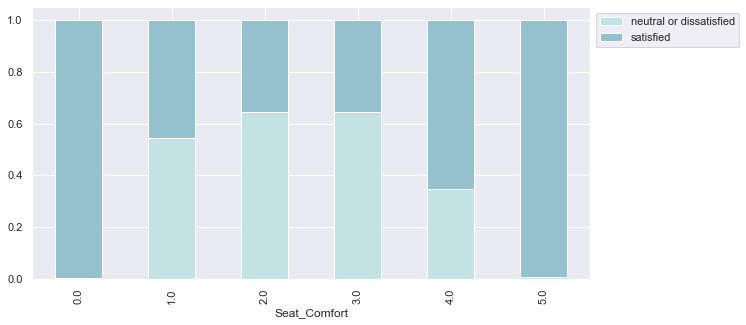

In [69]:
stacked_plot(df_p.Seat_Comfort)

**Observations:**
* Considering rates as:
extremely poor:0 | poor:1 | need improvement:2 | acceptable:3 | good: 4 | excellent: 5
* We can see that ratings from 1 to 3 presents a negative conversion rate, meaning whenever customers rate this variable within this range dissatisfaction overall increases. 

Satisfaction   neutral or dissatisfied  satisfied    All
Gate_Location                                           
0.0                                  0          1      1
1.0                               6133       9743  15876
2.0                               7222       9891  17113
3.0                              12585      10800  23385
4.0                              10621      10467  21088
5.0                               4595       8859  13454
All                              41156      49761  90917
------------------------------------------------------------------------------------------------------------------------


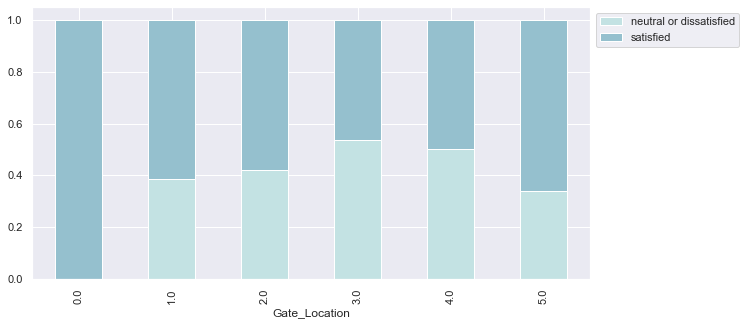

In [70]:
stacked_plot(df_p.Gate_Location)

**Observations:**
* Considering rates as:
extremely poor:0 | poor:1 | need improvement:2 | acceptable:3 | good: 4 | excellent: 5
* Rating 3 presents a negative conversion rate, meaning as those numbers increase the dissatisfaction also increases. For example by receiving an rating "acceptable", meaning you are acceptable for some customers but not for most of the customers causing the number of dissastiefied customers increase. 

Satisfaction  neutral or dissatisfied  satisfied    All
Food_Drink                                             
0.0                               825       2969   3794
1.0                              6521       6879  13400
2.0                              9903       7456  17359
3.0                             10278       7713  17991
4.0                              7091      10154  17245
5.0                              2851      10096  12947
All                             37469      45267  82736
------------------------------------------------------------------------------------------------------------------------


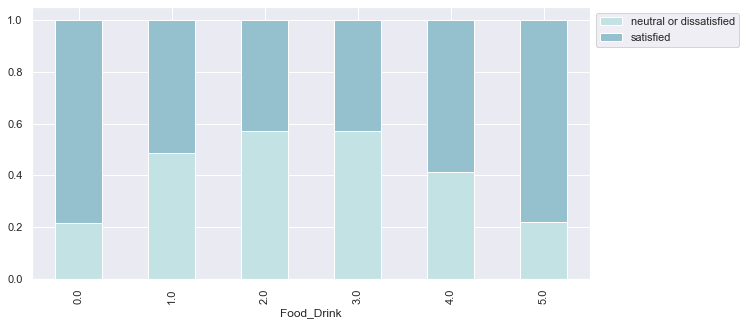

In [71]:
stacked_plot(df_p.Food_Drink)

**Observations:**
* Considering rates as:
extremely poor:0 | poor:1 | need improvement:2 | acceptable:3 | good: 4 | excellent: 5
* Rating between 2 and 3 presents a negative conversion rate, meaning as those numbers increase the dissatisfaction also increases.

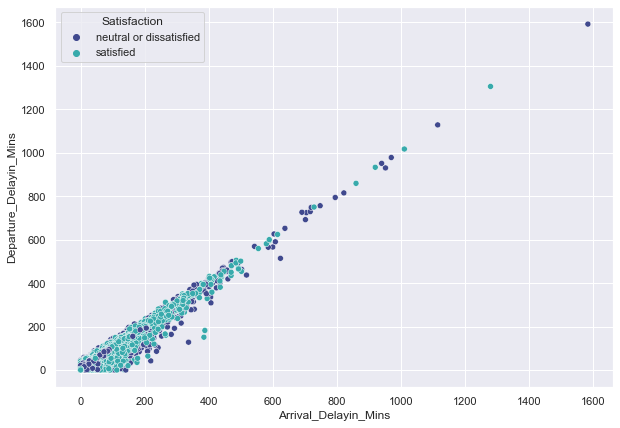

In [93]:
# Lets look at these relationship in graph
plt.figure(figsize=(10,7))
sns.scatterplot(y='Departure_Delayin_Mins', x='Arrival_Delayin_Mins', hue='Satisfaction', data=df_p, palette="mako");

**Observations:**
* It is intuitive that as Arrival Delays, Departure Delays aswell but from this chart we can see more customers dissastisfied above 360 min (Approx.6h) than satisfied ones.
* Seems like up a delay up to 200 min (3.3h) is more acceptable. 

In [46]:
#Export notebook to HTML type.
#os.system('jupyter nbconvert --to html Capstone_Aviation_Marketing_Project.ipynb')

0